In [1]:
import pandas as pd

In [3]:
from nba_api.stats.static import players

In [4]:
player_dictionary = players.get_players()

In [6]:
korver = [player for player in player_dictionary if player['full_name'] == 'Kyle Korver'][0]

In [7]:
korver_id = korver['id']

In [8]:
korver_id

2594

In [9]:
from nba_api.stats.static import teams

In [10]:
team_dict = teams.get_teams()

In [11]:
from nba_api.stats.endpoints import playergamelog

In [12]:
from nba_api.stats.library.parameters import SeasonAll

In [13]:
gamelog_korver_all = playergamelog.PlayerGameLog(player_id='2594', season = SeasonAll.all)

In [14]:
gamelog_korver_all

In [15]:
from nba_api.stats.endpoints import shotchartdetail

In [18]:
sixers = [team for team in team_dict if team['full_name'] == 'Philadelphia 76ers'][0]

In [20]:
sixers_id = sixers['id']

In [21]:
korver_shot_chart = shotchartdetail.ShotChartDetail(player_id=korver_id, team_id = sixers_id).get_data_frames()[0]

In [22]:
korver_shot_chart

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0020300119,178,2594,Kyle Korver,1610612755,Philadelphia 76ers,2,6,39,...,Left Side Center(LC),24+ ft.,24,-110,224,1,1,20031114,PHI,SAS
1,Shot Chart Detail,0020300119,381,2594,Kyle Korver,1610612755,Philadelphia 76ers,3,0,14,...,Right Side Center(RC),24+ ft.,25,138,210,1,1,20031114,PHI,SAS
2,Shot Chart Detail,0020300130,248,2594,Kyle Korver,1610612755,Philadelphia 76ers,2,0,33,...,Right Side(R),24+ ft.,23,230,-28,1,1,20031115,CLE,PHI
3,Shot Chart Detail,0020300154,194,2594,Kyle Korver,1610612755,Philadelphia 76ers,2,3,31,...,Right Side Center(RC),24+ ft.,25,227,107,1,1,20031119,TOR,PHI
4,Shot Chart Detail,0020300262,260,2594,Kyle Korver,1610612755,Philadelphia 76ers,2,1,22,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20031205,MIA,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,Shot Chart Detail,0020700408,448,2594,Kyle Korver,1610612755,Philadelphia 76ers,4,1,20,...,Left Side(L),24+ ft.,23,-233,-16,1,1,20071226,PHI,MIA
1217,Shot Chart Detail,0020700430,89,2594,Kyle Korver,1610612755,Philadelphia 76ers,1,1,19,...,Left Side(L),24+ ft.,23,-230,36,1,1,20071228,SAC,PHI
1218,Shot Chart Detail,0020700430,132,2594,Kyle Korver,1610612755,Philadelphia 76ers,2,7,40,...,Left Side(L),8-16 ft.,12,-126,5,1,1,20071228,SAC,PHI
1219,Shot Chart Detail,0020700430,156,2594,Kyle Korver,1610612755,Philadelphia 76ers,2,6,14,...,Left Side Center(LC),16-24 ft.,19,-123,145,1,1,20071228,SAC,PHI


In [24]:
from nba_api.stats.endpoints import shotchartlineupdetail

In [25]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
korver_shot_chart = shotchartdetail.ShotChartDetail(player_id=korver_id, team_id = sixers_id).get_data_frames()[0]

In [27]:
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(korver_shot_chart.head())

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0020300119,178,2594,Kyle Korver,1610612755,Philadelphia 76ers,2,6,39,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-110,224,1,1,20031114,PHI,SAS
1,Shot Chart Detail,0020300119,381,2594,Kyle Korver,1610612755,Philadelphia 76ers,3,0,14,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,138,210,1,1,20031114,PHI,SAS
2,Shot Chart Detail,0020300130,248,2594,Kyle Korver,1610612755,Philadelphia 76ers,2,0,33,Made Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,23,230,-28,1,1,20031115,CLE,PHI
3,Shot Chart Detail,0020300154,194,2594,Kyle Korver,1610612755,Philadelphia 76ers,2,3,31,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,227,107,1,1,20031119,TOR,PHI
4,Shot Chart Detail,0020300262,260,2594,Kyle Korver,1610612755,Philadelphia 76ers,2,1,22,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,20031205,MIA,PHI


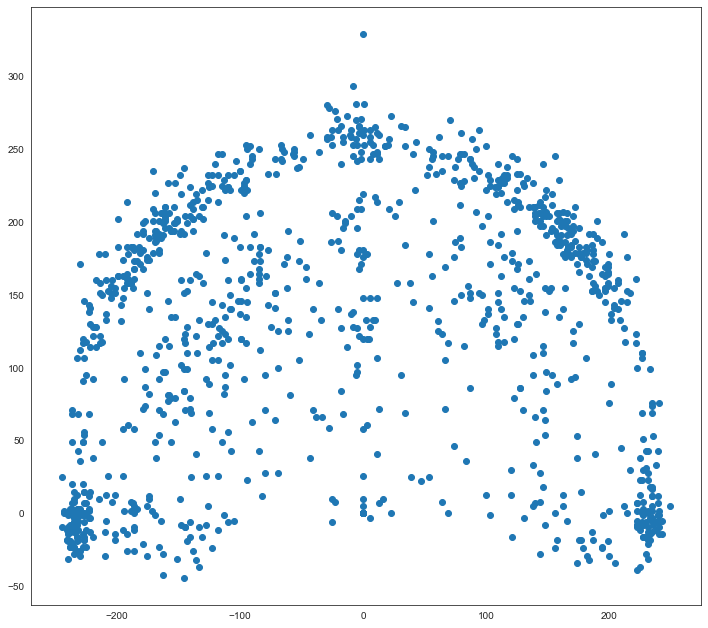

In [28]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(korver_shot_chart.LOC_X, korver_shot_chart.LOC_Y)
plt.show()

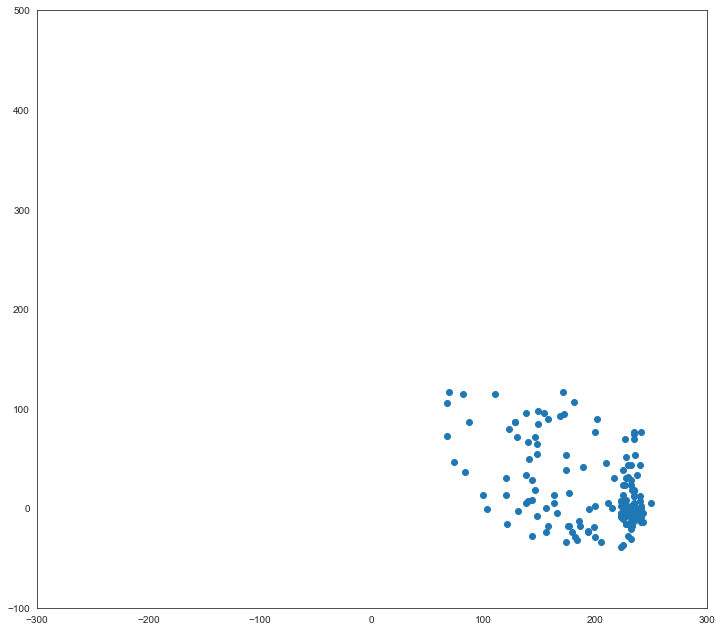

In [30]:
right = korver_shot_chart[korver_shot_chart.SHOT_ZONE_AREA == "Right Side(R)"]
plt.figure(figsize=(12,11))
plt.scatter(right.LOC_X, right.LOC_Y)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [31]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

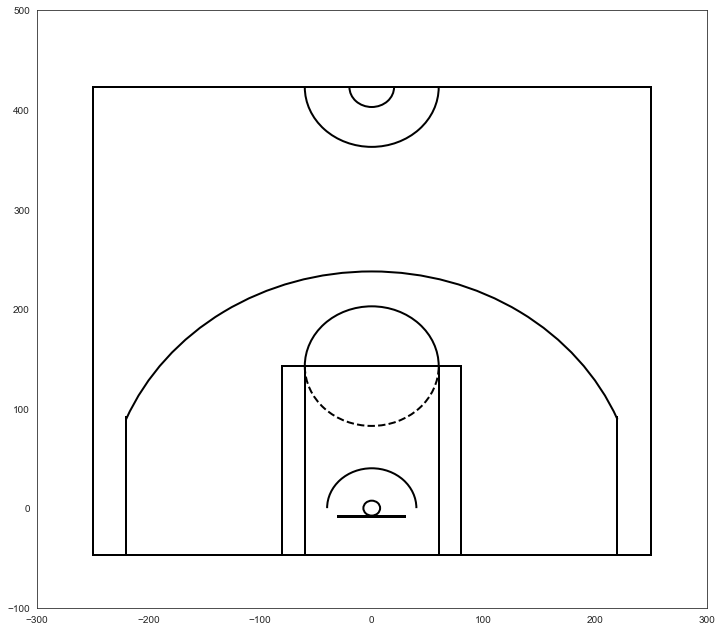

In [32]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

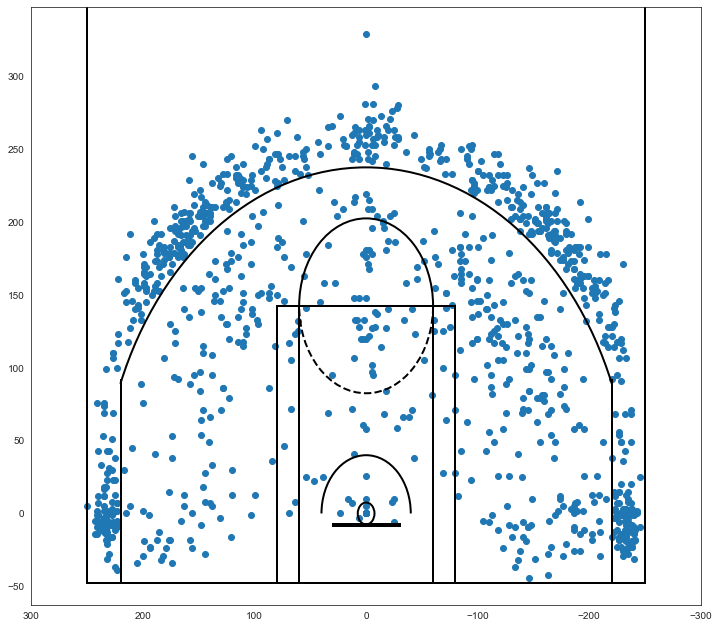

In [34]:
plt.figure(figsize=(12,11))
plt.scatter(korver_shot_chart.LOC_X, korver_shot_chart.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

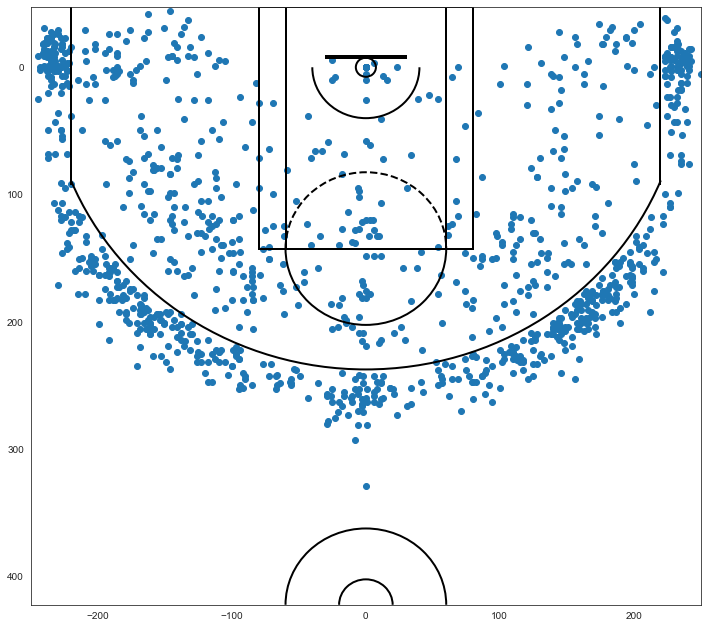

In [35]:
plt.figure(figsize=(12,11))
plt.scatter(korver_shot_chart.LOC_X, korver_shot_chart.LOC_Y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

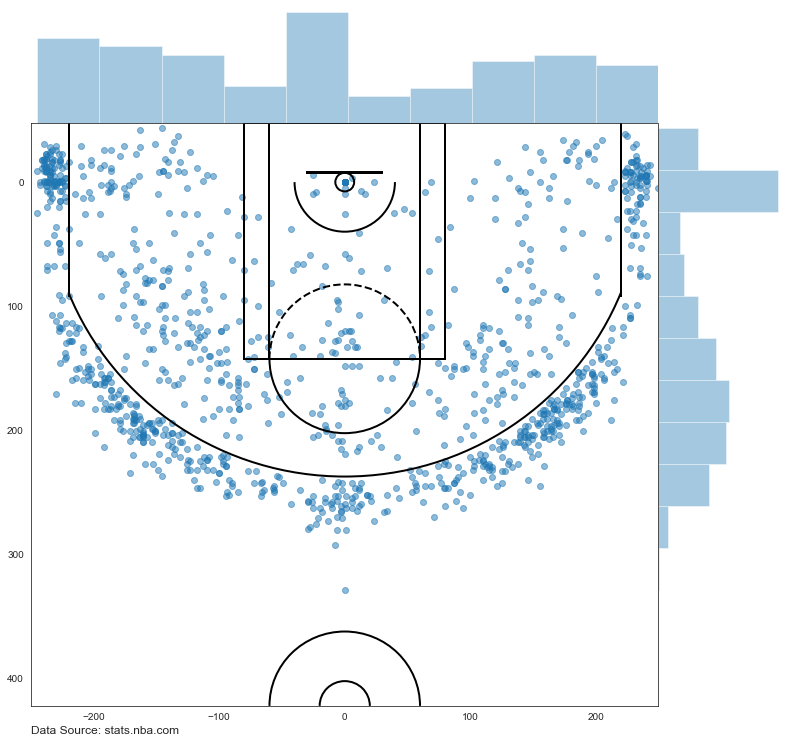

In [36]:
# create our jointplot
joint_shot_chart = sns.jointplot(korver_shot_chart.LOC_X, korver_shot_chart.LOC_Y, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Kyle Korver FGs On 76ers', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com', fontsize=12)

plt.show()

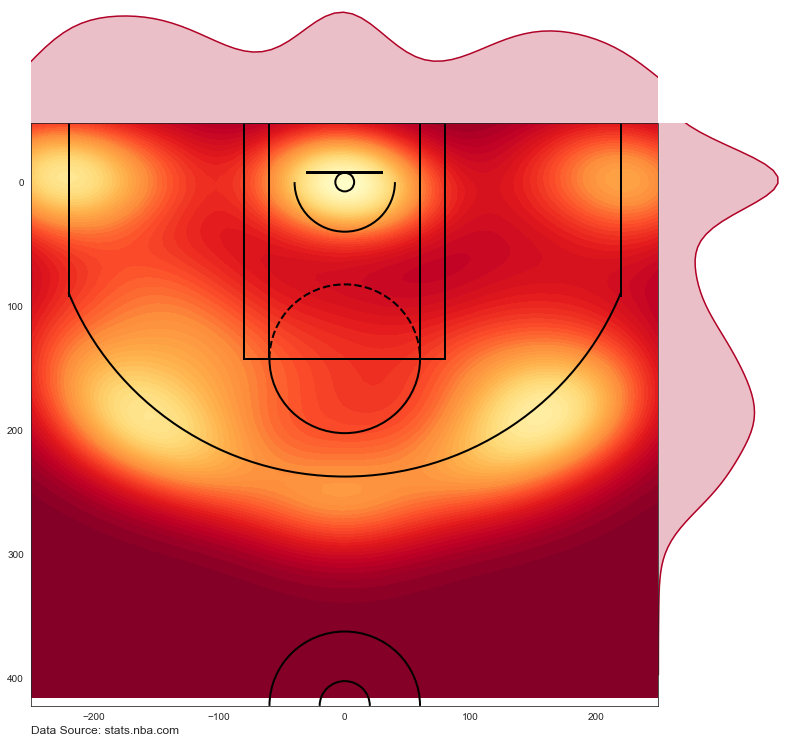

In [37]:
from matplotlib.offsetbox import  OffsetImage

# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(korver_shot_chart.LOC_X, korver_shot_chart.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Kyle Korver FGs on 76ers', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com',
        fontsize=12)

plt.show()

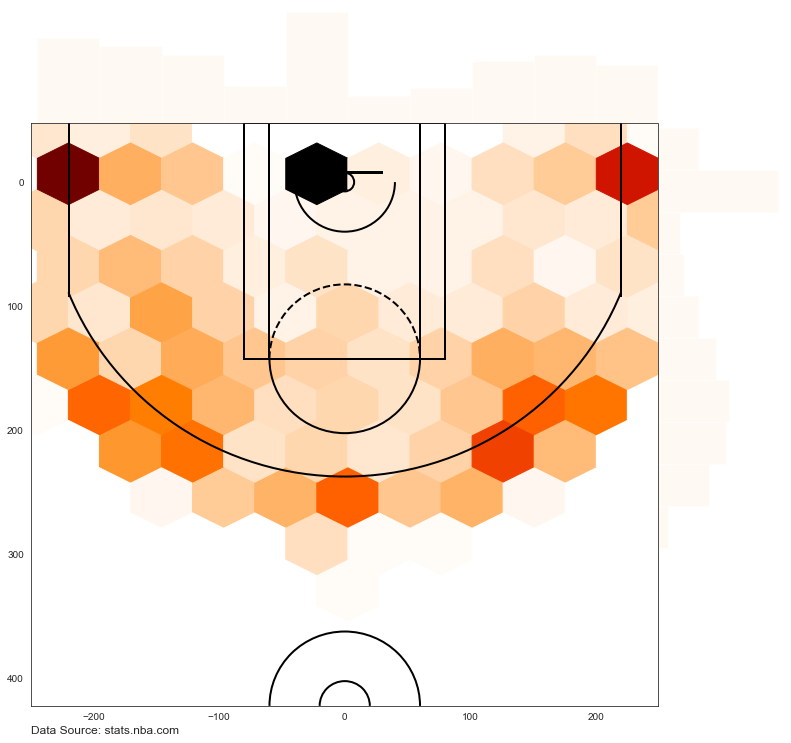

In [38]:
cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(korver_shot_chart.LOC_X, korver_shot_chart.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap(7), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off', labeltop='on')

# Add a title
ax.set_title('Kyle Korver FGs on 76ers', y=1.2, fontsize=14)

# Add Data Source and Author
ax.text(-250,445,'Data Source: stats.nba.com', fontsize=12)

plt.show()